<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/gold_apenas_didatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas necessárias apara análise dos dados

In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns

Importação do arquivo para criação do dataframe

In [2]:
df = pd.read_excel("gold.xlsx")

Visualização do data frame

In [ ]:
#São 1320 linhas por 7 colunas
df.tail()

,Date,Last,Open,High,Low,Change
1315,2025-02-10,2910.06,2892.22,2910.22,2891.19,0.61
1316,2025-02-11 00:00:00,2898.34,2907.47,2943.25,2881.75,-0.31
1317,2025-02-12 00:00:00,2903.66,2898.90,2909.16,2864.01,0.18
1318,2025-02-13 00:00:00,2929.03,2904.10,2929.74,2900.20,0.87
1319,2025-02-14 00:00:00,2883.18,2929.19,2940.23,2876.96,-1.57


Verificando o tipo de dados no data frame

In [ ]:
print(df.dtypes)

Convertendo a coluna Date para datetime

In [ ]:
#Código que converte a coluna Date para date time
df['Date'] = pd.to_datetime(df['Date'])

#Código que verifica o  tipo da coluna Date novamente
print(df['Date'].dtypes)

Verificando o tipo de dados completo do data frame

In [4]:
print(df.dtypes)

Date      datetime64[ns]
Last             float64
Open             float64
High             float64
Low              float64
Change           float64
dtype: object


Verificando se existem valores NANs

In [ ]:
df.isna().sum()
#Não existem dados NANs

Verificação estatística dos dados

In [6]:
df.describe()

,Date,Last,Open,High,Low,Change
count,1320,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2022-07-24 04:03:16.363636224,1963.347470,1963.362864,1977.499121,1948.917545,0.053386
min,2020-01-03 00:00:00,1477.900000,1471.600000,1502.800000,1450.900000,-4.990000
25%,2021-04-14 18:00:00,1782.450000,1784.000000,1795.425000,1772.500000,-0.440000
50%,2022-07-23 12:00:00,1876.600000,1877.800000,1891.650000,1864.650000,0.060000
75%,2023-11-01 06:00:00,2005.825000,2007.000000,2023.425000,1992.875000,0.610000
max,2025-02-14 00:00:00,2929.030000,2929.190000,2943.250000,2900.200000,5.950000
std,NaN,293.878464,293.070596,294.913516,292.030647,1.015575


#Relação de retornos sobre as colunas

Coluna Open em relação a mediana e a média

In [ ]:
#Criando um data frame que armazena os últimos 55 valores do ouro
df_provisorio = df.tail(55)

#Visualizando as informações descritivas do df_provisorio
descricoes_estatisticas = df_provisorio.describe()

#descricoes_estatisticas

#Criando a variável que armazena o preço médio do ouro nos últimos 55 dias de pregão
preco_medio_open = df_provisorio['Open'].mean()
preco_medio_last = df_provisorio['Last'].mean()

#Criando a variável que armazena os valores do preço mínimo e máximo de Open e Last dos últimos 55 dias de pregão
preco_min_open = df_provisorio['Open'].min()
preco_max_open = df_provisorio['Open'].max()
preco_min_last = df_provisorio['Last'].min()
preco_max_last = df_provisorio['Last'].max()

#Mudança diária média e o desvio padrão da coluna Change
mudanca_media = df_provisorio['Change'].mean()
mudanca_desvio = df_provisorio['Change'].std()

#Valores extremos de mudança diária
mudanca_min = df_provisorio['Change'].min()
mudanca_max = df_provisorio['Change'].max()

#Calculando o preço médio entre Open e Last
media_open_last = (preco_medio_open + preco_medio_last) / 2

#Visualizando os resultados obtidos pelas variáveis
print(f'Esse é o preço médio da coluna Open {preco_medio_open:.2f}')
print(f'Esse é o preço médio da coluna Last {preco_medio_last:.2f}')
print(f'Esse é o preço mínimo da coluna Open {preco_min_open:.2f}')
print(f'Esse é o preço máximo da coluna Open {preco_max_open:.2f}')
print(f'Esse é o preço mínimo da coluna Last {preco_min_last:.2f}')
print(f'Esse é o preço máximo da coluna Last {preco_max_last:.2f}')
print(f'Essa é a mudança diária média da coluna Change {mudanca_media:.2f}')
print(f'Esse é o desvio padrão da coluna Change {mudanca_desvio:.2f}')
print(f'Essa é a menor variação da coluna Change {mudanca_min:.2f}')
print(f'Essa é a maior variação da coluna Change {mudanca_max:.2f}')
print(f'Esse é o preço médio entre Open e Last {media_open_last:.2f}')

#Analisando de forma gráfica os últimos 55 registros de pregão do ouro

Criando um gráfico da coluna Last

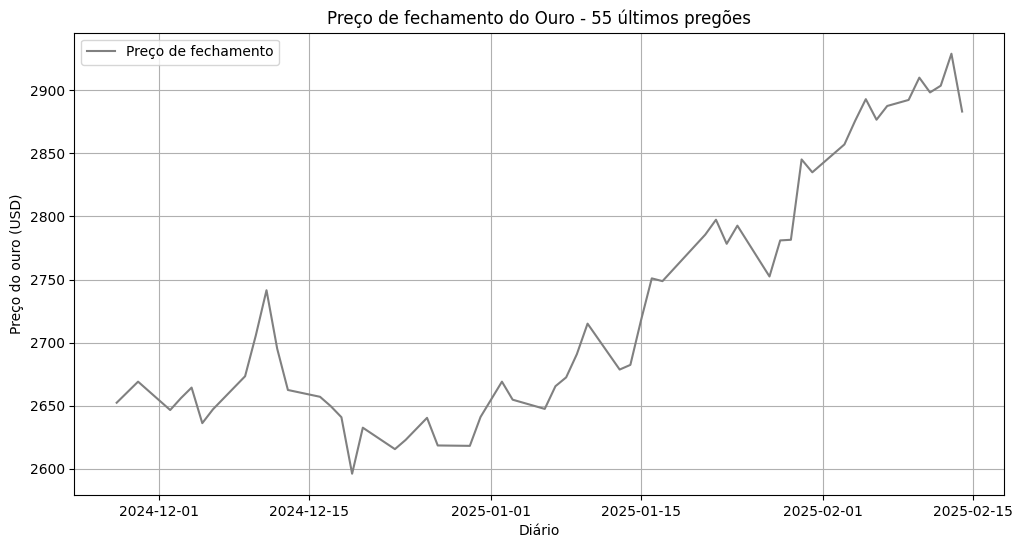

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df_provisorio['Date'], df_provisorio['Last'], label='Preço de fechamento', color='gray')
plt.xlabel('Diário')
plt.ylabel('Preço do ouro (USD)')
plt.title('Preço de fechamento do Ouro - 55 últimos pregões')
plt.legend()
plt.grid(True)
plt.show()

Criando um gráfico boxplot

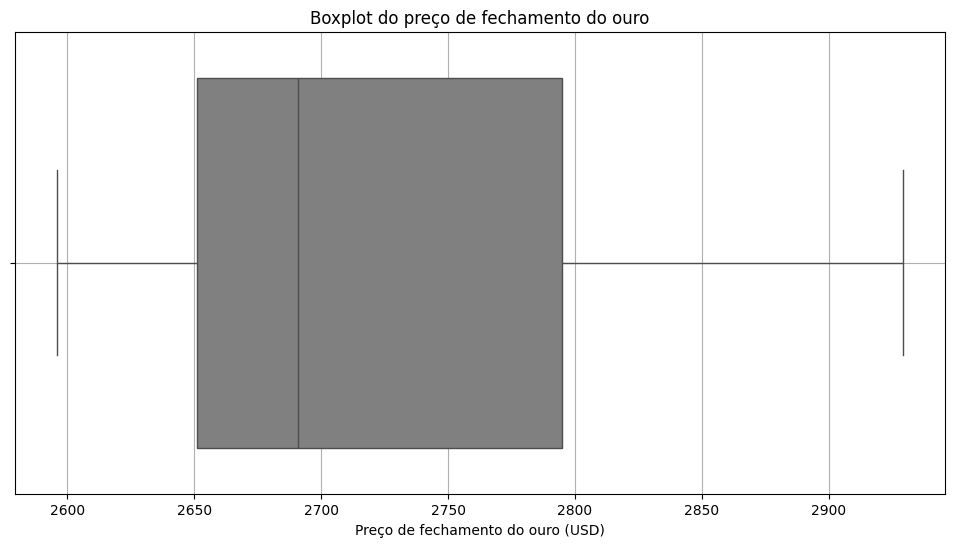

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_provisorio['Last'], color='gray')
plt.xlabel('Preço de fechamento do ouro (USD)')
plt.title('Boxplot do preço de fechamento do ouro')
plt.grid(True)
plt.show()